# Introducción

Keras es una biblioteca de aprendizaje profundo de código abierto escrita en Python. Fue desarrollada inicialmente por François Chollet y se lanzó por primera vez en marzo de 2015. Keras se ha convertido en una de las bibliotecas más populares para el desarrollo de modelos de aprendizaje profundo debido a su facilidad de uso y flexibilidad.

En esta ocasión utilizaremos los datos de MNIST, que es un conjunto de datos de imágenes de dígitos escritos a mano, que se utiliza comúnmente en el aprendizaje automático y el reconocimiento de patrones.

Entonces, lo primero que hacemos es importar los paquetes necesarios:

In [1]:
# MNIST
from keras.datasets import mnist
# Matplotlib
import matplotlib.pyplot as plt
# NumPy
import numpy as np
# Keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

Entonces, ahora cargamos los datos:

In [2]:
# Obtenemos los datos de entrenamiento y de test.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Mostramos el shape del dataset de entrenamiento:

In [3]:
print(x_train.shape)

(60000, 28, 28)


Mostramos cómo son los datos que tenemos en una imágen:

1


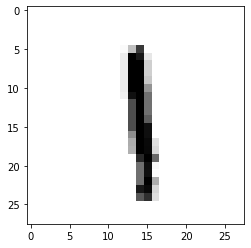

In [4]:
plt.imshow(x_train[8], cmap=plt.cm.binary)
print(y_train[8])

Transformamos los datos:

In [5]:
# Convertimos los datos a decimales para que después podamos dividirlos por 255.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Dividimos los datos por 255 para ponerlos en la escala de 1.
x_train /= 255
x_test /= 255

Podemos ver que ahora los datos se encuentran entre 0 y 1.

In [6]:
print(np.matrix(x_train[8]))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Hacemos el reshape para que los redimensionar los datos.

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Transformamos los datos de salida, es decir, como en este caso tenemos 10 posibles categorías diferentes (0,1,2,3,4,5,6,7,8,9), transformamos la variable objetivo, y obtenemos un array de 10 elementos, en el que el la posición del 1 indica a la categoría a la que pertenece.

In [8]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Creamos el modelo en modo secuencial, es decir, añadiendo las diferentes capas uno a uno:

In [9]:
# Creamos el modelo.
model = Sequential()
# Añadimos una capa densa de 10 nodos.
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
# Añadimos la capa de salida de 10 nodos (10 categorías diferentes [0,1,2,3,4,5,6,7,8,9])
model.add(Dense(10, activation='softmax'))

# Mostramos el resumen del modelo creado.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Definimos el entrenamiento y la validación que se aplicarán al modelo.

In [10]:
# La cantidad de datos con la que se alimenta el modelo en cada iteración del entrenamiento.
batch_size = 50
# Número de posibles salidas.
num_classes = 10
# Número de veces que se procesa todo el conjunto durante el entrenamiento.
epochs=10

# Compilamos el modelo con la función de pérdida, el optimizados y las métricas correspondientes.
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Ajustamos el modelo.
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1
          )

# Obtenemos los resultados de evaluación del modelo.
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
1200/1200 [==============================] - 6s 4ms/step - loss: 2.0677 - accuracy: 0.4715
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 1.6137 - accuracy: 0.6604
Epoch 3/10
1200/1200 [==============================] - 3s 2ms/step - loss: 1.2749 - accuracy: 0.7289
Epoch 4/10
1200/1200 [==============================] - 3s 3ms/step - loss: 1.0510 - accuracy: 0.7783
Epoch 5/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.9017 - accuracy: 0.8066
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.7975 - accuracy: 0.8238
Epoch 7/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.7215 - accuracy: 0.8371
Epoch 8/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.6636 - accuracy: 0.8468
Epoch 9/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.6177 - accuracy: 0.8553
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5469 

Predecimos los datos de test.

In [11]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Podemos ver que las predicciones nos devuelven las probabilidades de permanecer a cada clase. En este caso podemos ver que el modelo predice un 7:

In [12]:
print('Array predicho:', predictions[0])
print('Número predicho:', np.argmax(predictions[0]))

Array predicho: [4.6120263e-03 1.3013165e-03 2.5846360e-02 9.0708593e-03 7.7625168e-03
 4.2147622e-03 3.3692780e-04 8.6526763e-01 1.4506828e-02 6.7080796e-02]
Número predicho: 7


Comprobamos que el valor predicho es el que debería ser:

In [13]:
np.argmax(y_test[0]) == np.argmax(predictions[0])

True